In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
SAMPLES = 1000
SEED = 214823

In [3]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

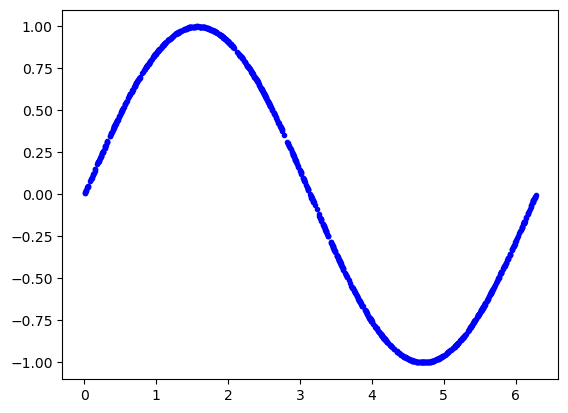

In [4]:
x_vals = np.random.uniform(low=0, high=2 * math.pi, size=SAMPLES)
np.random.shuffle(x_vals)
y_vals = np.sin(x_vals)
plt.plot(x_vals, y_vals, 'b.')
plt.show()

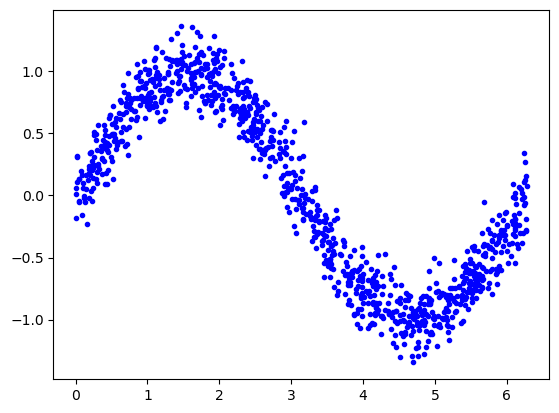

In [5]:
y_vals += 0.15 * np.random.randn(*y_vals.shape)
plt.plot(x_vals, y_vals, 'b.')
plt.show()

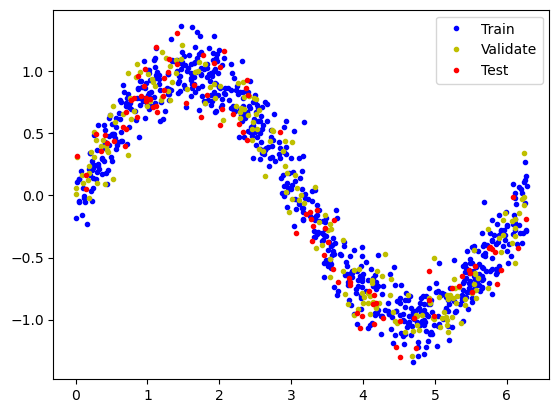

In [6]:
TRAIN_SPLIT = int(.7 * SAMPLES)
TEST_SPLIT = int(.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_vals, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_vals, [TRAIN_SPLIT, TEST_SPLIT])

assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

plt.plot(x_train, y_train, 'b.', label='Train')
plt.plot(x_validate, y_validate, 'y.', label='Validate')
plt.plot(x_test, y_test, 'r.', label='Test')
plt.legend()
plt.show()

In [7]:
model = tf.keras.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=16,
    validation_data=(x_validate, y_validate)
)

Epoch 1/1000


2024-11-11 12:09:36.361121: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 0s 2ms/step - loss: 0.4294 - mae: 0.5498 - val_loss: 0.3480 - val_mae: 0.5153
Epoch 2/1000
44/44 [==============================] - 0s 762us/step - loss: 0.3419 - mae: 0.5005 - val_loss: 0.2809 - val_mae: 0.4512
Epoch 3/1000
44/44 [==============================] - 0s 720us/step - loss: 0.2801 - mae: 0.4515 - val_loss: 0.2332 - val_mae: 0.4209
Epoch 4/1000
44/44 [==============================] - 0s 687us/step - loss: 0.2380 - mae: 0.4200 - val_loss: 0.2104 - val_mae: 0.4032
Epoch 5/1000
44/44 [==============================] - 0s 715us/step - loss: 0.2061 - mae: 0.3889 - val_loss: 0.1911 - val_mae: 0.3807
Epoch 6/1000
44/44 [==============================] - 0s 704us/step - loss: 0.1868 - mae: 0.3697 - val_loss: 0.1722 - val_mae: 0.3447
Epoch 7/1000
44/44 [==============================] - 0s 711us/step - loss: 0.1771 - mae: 0.3557 - val_loss: 0.1841 - val_mae: 0.3592
Epoch 8/1000
44/44 [==============================] - 0s 715us/step - loss: 0

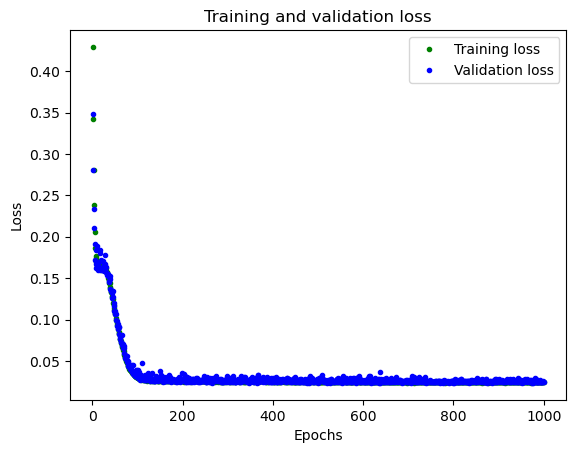

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

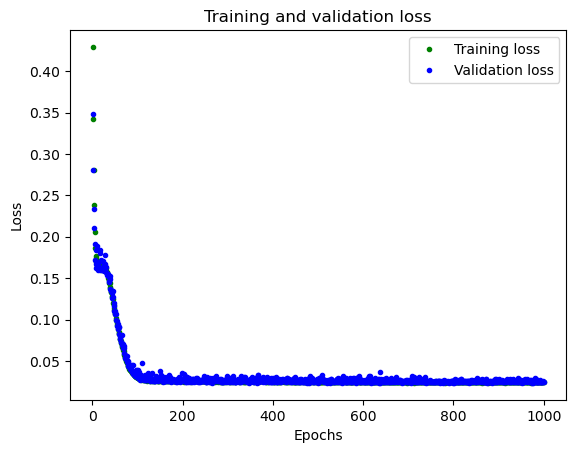

In [10]:
SKIP = 0
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

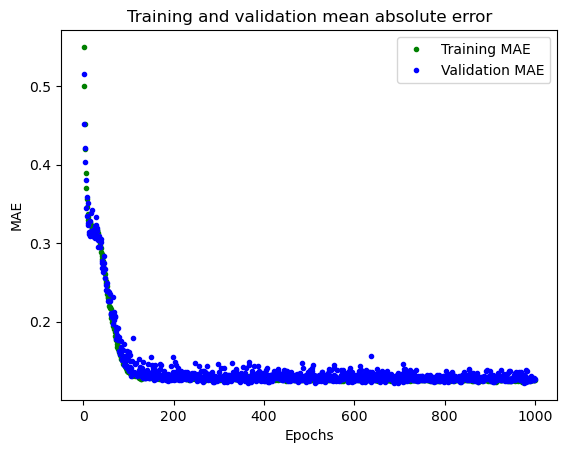

In [11]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

4/4 [==============================] - 0s 638us/step


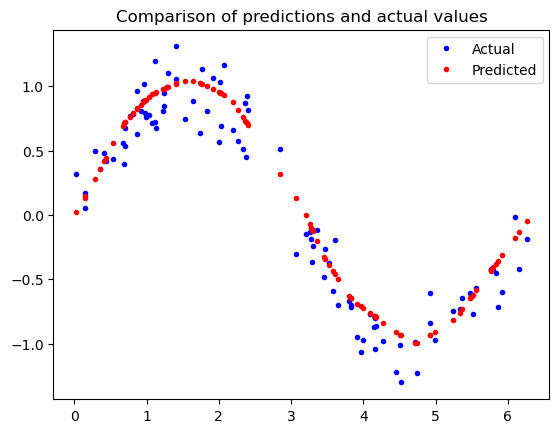

In [12]:
pred = model.predict(x_test)
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, pred, 'r.', label='Predicted')
plt.legend()
plt.show()

In [13]:
model.save('./assets/learned_sin_model.h5')

In [14]:
df_test = pd.DataFrame(x_test)
df_gt = pd.DataFrame(y_test)
df_test.to_csv('./assets/df_test.csv', index=False)
df_gt.to_csv('./assets/df_gt.csv', index=False)

4/4 [==============================] - 0s 669us/step


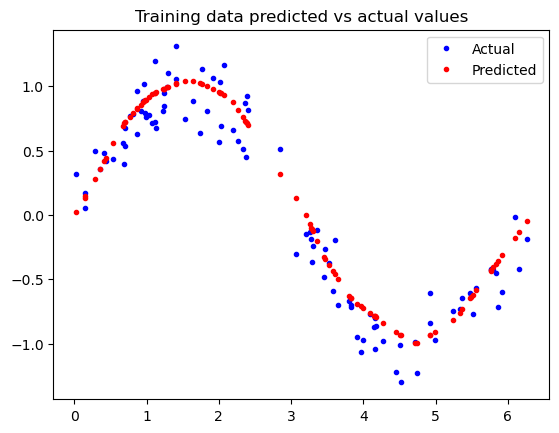

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

test_data = pd.read_csv('./assets/df_test.csv')
answer_data = pd.read_csv('./assets/df_gt.csv')
test_data = test_data.to_numpy()
answer_data = answer_data.to_numpy()

from tensorflow import keras
model = keras.models.load_model('./assets/learned_sin_model.h5')

predictions = model.predict(test_data)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(test_data, answer_data, 'b.', label='Actual')
plt.plot(test_data, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()